In [1]:
import numpy as np

%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib as mpl

import sys
sys.path.append("../")
import GSHEWaveform

# Functions to turn on and off custom plotting
def default_mplstyle():
    mpl.rcParams.update(mpl.rcParamsDefault)
    
def custom_mplstyle():
    mpl.style.use("../plot_style.txt")
    
def ylabel_with_offset(ax, label):
    ax.yaxis.offsetText.set_visible(False)
    offset = ax.yaxis.get_major_formatter().get_offset()
    ax.set_ylabel(r"{} {}".format(label, offset))
    
    
%load_ext autoreload
%autoreload 2

Data from the Julia integrator:

In [2]:
runID = "01"


Xgeos = np.load("../data/{}Xgeos.npy".format(runID))
Xgshes = np.load("../data/{}Xgshes.npy".format(runID))
epsilons = np.load("../data/{}Epsilons.npy".format(runID))
x = np.load("../data/{}VaryParam.npy".format(runID))

k = 80
print(x[k]/np.pi)

Xgeo = Xgeos[k, ...]
Xgshe = Xgshes[k, ...]

0.4030133159793218


<IPython.core.display.Javascript object>


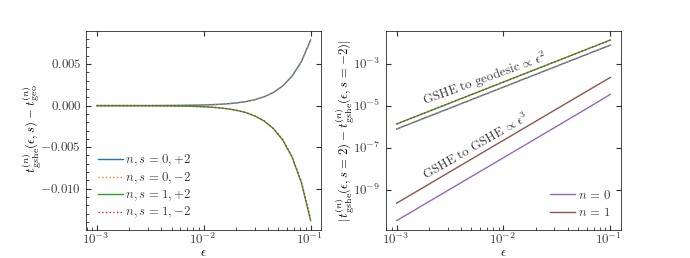

In [20]:
custom_mplstyle()

polardict = {0: "+2", 1: "-2"}
polarls = {0: "-", 1: "dotted"}
# default_mplstyle()

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(3.45*2,3.45*0.75))
fig.subplots_adjust(hspace=0, wspace=0.275)

for igeo in [0, 1]:
    for s in [0, 1]:
        dtgeo = Xgshe[igeo, s, :, 2] - Xgeo[igeo, 2]

        label = r"$n, s = {},{}$".format(igeo, polardict[s])
            
        axes[0].plot(epsilons, dtgeo, ls=polarls[s],label=label)
        axes[1].plot(epsilons, np.abs(dtgeo), ls=polarls[s])
        
    
for igeo in [0, 1]:
    dtpol = np.abs(Xgshe[igeo, 0, :, 2] - Xgshe[igeo, 1, :, 2])
    label = r"$n = {}$".format(igeo)
    axes[1].plot(epsilons, dtpol, label=label)
        

        
plt.savefig("/Users/richard/Downloads/_tmp.png")

axes[0].legend()
for ax in axes:
    ax.set_xlabel(r"$\epsilon$")
    ax.set_xscale("log")
    

axes[0].legend()
axes[1].legend(loc=4)
ylabel_with_offset(axes[0], r"$t^{(n)}_{\rm gshe}(\epsilon, s) - t^{(n)}_{\rm geo}$")
axes[1].set_ylabel(r"$|t^{(n)}_{\rm gshe}(\epsilon, s=2) - t^{(n)}_{\rm gshe}(\epsilon, s=-2)|$")


axes[1].set_yscale("log")
axes[1].set_yscale("log")

# Slope comments
axes[1].text(0.15, 0.90, r"GSHE to geodesic $\propto \epsilon^2$", transform=axes[1].transAxes,
        verticalalignment='top', rotation=20)
axes[1].text(0.15, 0.59, r"GSHE to GSHE $\propto \epsilon^3$", transform=axes[1].transAxes,
        verticalalignment='top', rotation=30)

fig.savefig("/Users/richard/Downloads/configuration_delay.pdf", bbox_inches="tight", dpi=300)
fig.show()